In [1]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sun Mar  3 09:25:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                            

In [2]:
pip install tsfresh

In [3]:
import pandas as pd
import os
import numpy as np
import sys
import tsfresh as tsf
from tsfresh.utilities.dataframe_functions import impute

In [4]:
os.chdir('/content/drive/MyDrive/FYP_Python_Notebooks/POI_Aggregation')

In [5]:
os.chdir('/content/drive/MyDrive/FYP_Python_Notebooks/POI_Aggregation/School')
zones_with_school = pd.read_csv('zones_with_school.csv')
zones_with_school = zones_with_school['PULocationID'].tolist()
zones_with_school = [str(element) for element in zones_with_school if element != 103]

zones_with_school_uni = pd.read_csv('zones_with_school_uni.csv')
zones_with_school_uni = zones_with_school_uni['PULocationID'].tolist()
zones_with_school_uni = [str(element) for element in zones_with_school_uni if element != 103]

zones_with_school_sec = pd.read_csv('zones_with_school_sec.csv')
zones_with_school_sec = zones_with_school_sec['PULocationID'].tolist()
zones_with_school_sec = [str(element) for element in zones_with_school_sec if element != 103]

zones_with_school_pri = pd.read_csv('zones_with_school_pri.csv')
zones_with_school_pri = zones_with_school_pri['PULocationID'].tolist()
zones_with_school_pri = [str(element) for element in zones_with_school_pri if element != 103]

In [6]:
os.chdir('/content/drive/MyDrive/FYP_Python_Notebooks/POI_Aggregation/Food')
zones_with_food = pd.read_csv('zones_with_food.csv')
zones_with_food = zones_with_food['PULocationID'].tolist()
zones_with_food = [str(element) for element in zones_with_food if element != 103]

zones_with_food_restaurant = pd.read_csv('zones_with_food_restaurant.csv')
zones_with_food_restaurant = zones_with_food_restaurant['PULocationID'].tolist()
zones_with_food_restaurant = [str(element) for element in zones_with_food_restaurant if element != 103]

zones_with_food_morning = pd.read_csv('zones_with_food_morning.csv')
zones_with_food_morning = zones_with_food_morning['PULocationID'].tolist()
zones_with_food_morning = [str(element) for element in zones_with_food_morning if element != 103]

zones_with_food_bar = pd.read_csv('zones_with_food_bar.csv')
zones_with_food_bar = zones_with_food_bar['PULocationID'].tolist()
zones_with_food_bar = [str(element) for element in zones_with_food_bar if element != 103]

In [7]:
os.chdir('/content/drive/MyDrive/FYP_Python_Notebooks/POI_Aggregation/Attractions')
zones_with_attractions = pd.read_csv('zones_with_attractions.csv')
zones_with_attractions = zones_with_attractions['PULocationID'].tolist()
zones_with_attractions = [str(element) for element in zones_with_attractions if element != 103]

In [8]:
os.chdir('/content/drive/MyDrive/FYP_Python_Notebooks/POI_Aggregation/Religious')
zones_with_religious = pd.read_csv('zones_with_religious.csv')
zones_with_religious = zones_with_religious['PULocationID'].tolist()
zones_with_religious = [str(element) for element in zones_with_religious if element != 103]

In [9]:
os.chdir('/content/drive/MyDrive/FYP_Python_Notebooks')
df_outf = pd.read_csv('combined_demand_df_1h.csv')
df_outf = df_outf.drop('time_slot', axis=1)

df_inf = pd.read_csv('combined_supply_df_1h.csv')
df_inf = df_inf.drop('time_slot', axis=1)

In [10]:
os.chdir('/content/drive/MyDrive/FYP_Python_Notebooks/POI_Aggregation')

ts_school_outflow = df_outf[zones_with_school]
ts_school_outflow['school'] = ts_school_outflow.sum(axis=1)
ts_school_outflow.to_csv("school_demand_for_recon_training.csv")

ts_school_inflow = df_inf[zones_with_school]
ts_school_inflow['school'] = ts_school_inflow.sum(axis=1)

ts_school_uni_outflow = df_outf[zones_with_school_uni]
ts_school_uni_outflow['school_uni'] = ts_school_outflow.sum(axis=1)
ts_school_uni_outflow.to_csv("school_uni_demand_for_recon_training.csv")

ts_school_uni_inflow = df_inf[zones_with_school_uni]
ts_school_uni_inflow['school_uni'] = ts_school_inflow.sum(axis=1)

ts_school_sec_outflow = df_outf[zones_with_school_sec]
ts_school_sec_outflow['school_sec'] = ts_school_outflow.sum(axis=1)
ts_school_sec_outflow.to_csv("school_sec_demand_for_recon_training.csv")

ts_school_sec_inflow = df_inf[zones_with_school_sec]
ts_school_sec_inflow['school_sec'] = ts_school_inflow.sum(axis=1)

ts_school_pri_outflow = df_outf[zones_with_school_pri]
ts_school_pri_outflow['school_pri'] = ts_school_outflow.sum(axis=1)
ts_school_pri_outflow.to_csv("school_pri_demand_for_recon_training.csv")

ts_school_pri_inflow = df_inf[zones_with_school_pri]
ts_school_pri_inflow['school_pri'] = ts_school_inflow.sum(axis=1)

<ipython-input-10-4c7e4c255583>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_school_outflow['school'] = ts_school_outflow.sum(axis=1)
<ipython-input-10-4c7e4c255583>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_school_inflow['school'] = ts_school_inflow.sum(axis=1)
<ipython-input-10-4c7e4c255583>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [11]:
ts_food_outflow = df_outf[zones_with_food]
ts_food_outflow['food'] = ts_food_outflow.sum(axis=1)
ts_food_outflow.to_csv("food_demand_for_recon_training.csv")

ts_food_inflow = df_inf[zones_with_food]
ts_food_inflow['food'] = ts_food_inflow.sum(axis=1)

ts_food_restaurant_outflow = df_outf[zones_with_food_restaurant]
ts_food_restaurant_outflow['food_restaurant'] = ts_food_restaurant_outflow.sum(axis=1)
ts_food_restaurant_outflow.to_csv("food_restaurant_demand_for_recon_training.csv")

ts_food_restaurant_inflow = df_inf[zones_with_food_restaurant]
ts_food_restaurant_inflow['food_restaurant'] = ts_food_restaurant_inflow.sum(axis=1)

ts_food_morning_outflow = df_outf[zones_with_food_morning]
ts_food_morning_outflow['food_morning'] = ts_food_morning_outflow.sum(axis=1)
ts_food_morning_outflow.to_csv("food_morning_demand_for_recon_training.csv")

ts_food_morning_inflow = df_inf[zones_with_food_morning]
ts_food_morning_inflow['food_morning'] = ts_food_morning_inflow.sum(axis=1)

ts_food_bar_outflow = df_outf[zones_with_food_bar]
ts_food_bar_outflow['food_bar'] = ts_food_bar_outflow.sum(axis=1)
ts_food_bar_outflow.to_csv("food_bar_demand_for_recon_training.csv")

ts_food_bar_inflow = df_inf[zones_with_food_bar]
ts_food_bar_inflow['food_bar'] = ts_food_bar_inflow.sum(axis=1)

<ipython-input-11-31e670e7e710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_food_outflow['food'] = ts_food_outflow.sum(axis=1)
<ipython-input-11-31e670e7e710>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_food_inflow['food'] = ts_food_inflow.sum(axis=1)
<ipython-input-11-31e670e7e710>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [12]:
ts_attractions_outflow = df_outf[zones_with_attractions]
ts_attractions_outflow['attractions'] = ts_attractions_outflow.sum(axis=1)
ts_attractions_outflow.to_csv("attractions_demand_for_recon_training.csv")

ts_attractions_inflow = df_inf[zones_with_attractions]
ts_attractions_inflow['attractions'] = ts_attractions_inflow.sum(axis=1)

ts_religious_outflow = df_outf[zones_with_religious]
ts_religious_outflow['religious'] = ts_religious_outflow.sum(axis=1)
ts_religious_outflow.to_csv("religious_demand_for_recon_training.csv")

ts_religious_inflow = df_inf[zones_with_religious]
ts_religious_inflow['religious'] = ts_religious_inflow.sum(axis=1)

<ipython-input-12-797517c70857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_attractions_outflow['attractions'] = ts_attractions_outflow.sum(axis=1)
<ipython-input-12-797517c70857>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_attractions_inflow['attractions'] = ts_attractions_inflow.sum(axis=1)
<ipython-input-12-797517c70857>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [14]:
selected_columns_outflow = []
selected_columns_inflow = []
dfs_outflow = [ts_school_outflow, ts_school_uni_outflow, ts_school_sec_outflow, ts_school_pri_outflow, ts_food_outflow, ts_food_restaurant_outflow, ts_food_morning_outflow, ts_food_bar_outflow, ts_attractions_outflow,ts_religious_outflow]
dfs_inflow = [ts_school_inflow, ts_school_uni_inflow, ts_school_sec_inflow, ts_school_pri_inflow, ts_food_inflow, ts_food_restaurant_inflow, ts_food_morning_inflow, ts_food_bar_inflow, ts_attractions_inflow,ts_religious_inflow]
selected_column_names = ['school', 'school_uni', 'school_sec', 'school_pri', 'food', 'food_restaurant', 'food_morning', 'food_bar', 'attractions', 'religious']

for idx, col_name in enumerate(selected_column_names):
    selected_columns_outflow.append(dfs_outflow[idx][col_name])
    selected_columns_inflow.append(dfs_inflow[idx][col_name])

poi_demand = pd.concat(selected_columns_outflow, axis=1)
poi_supply = pd.concat(selected_columns_inflow, axis=1)

poi_demand

,school,school_uni,school_sec,school_pri,food,food_restaurant,food_morning,food_bar,attractions,religious
0,449.0,898.0,898.0,898.0,797.0,774.0,462.0,554.0,332.0,125.0
1,493.0,986.0,986.0,986.0,943.0,916.0,542.0,644.0,367.0,139.0
2,330.0,660.0,660.0,660.0,659.0,636.0,367.0,485.0,288.0,84.0
3,158.0,316.0,316.0,316.0,321.0,306.0,191.0,229.0,137.0,28.0
4,87.0,174.0,174.0,174.0,173.0,171.0,104.0,129.0,79.0,18.0
...,...,...,...,...,...,...,...,...,...,...
24808,2251.0,4502.0,4502.0,4502.0,4275.0,4168.0,2373.0,2999.0,1323.0,732.0
24809,1939.0,3878.0,3878.0,3878.0,3901.0,3799.0,2171.0,2797.0,1274.0,637.0
24810,1722.0,3444.0,3444.0,3444.0,3828.0,3698.0,2047.0,2807.0,1546.0,602.0
24811,1406.0,2812.0,2812.0,2812.0,3336.0,3225.0,1720.0,2512.0,1453.0,452.0


In [15]:
poi_supply

,school,school_uni,school_sec,school_pri,food,food_restaurant,food_morning,food_bar,attractions,religious
0,422.0,844.0,844.0,844.0,657.0,628.0,424.0,373.0,246.0,137.0
1,410.0,820.0,820.0,820.0,765.0,741.0,470.0,463.0,317.0,150.0
2,285.0,570.0,570.0,570.0,550.0,532.0,337.0,348.0,215.0,107.0
3,143.0,286.0,286.0,286.0,275.0,266.0,160.0,177.0,116.0,44.0
4,69.0,138.0,138.0,138.0,136.0,128.0,66.0,80.0,47.0,17.0
...,...,...,...,...,...,...,...,...,...,...
24808,2331.0,4662.0,4662.0,4662.0,4082.0,3936.0,2511.0,2601.0,1524.0,840.0
24809,2082.0,4164.0,4164.0,4164.0,3838.0,3679.0,2340.0,2478.0,1354.0,697.0
24810,1957.0,3914.0,3914.0,3914.0,3660.0,3533.0,2177.0,2454.0,1361.0,665.0
24811,1654.0,3308.0,3308.0,3308.0,3147.0,3010.0,1870.0,2138.0,1273.0,582.0


In [16]:
def remove_similar_elements(lst, threshold, index=0):
    if index >= len(lst) - 1:
        return lst

    current_element = lst[index]
    new_list = [current_element]

    for i in range(index + 1, len(lst)):
        if abs(current_element - lst[i]) > threshold:
            new_list.append(lst[i])

    lst[index + 1:] = remove_similar_elements(new_list[1:], threshold)
    return remove_similar_elements(lst, threshold, index + 1)

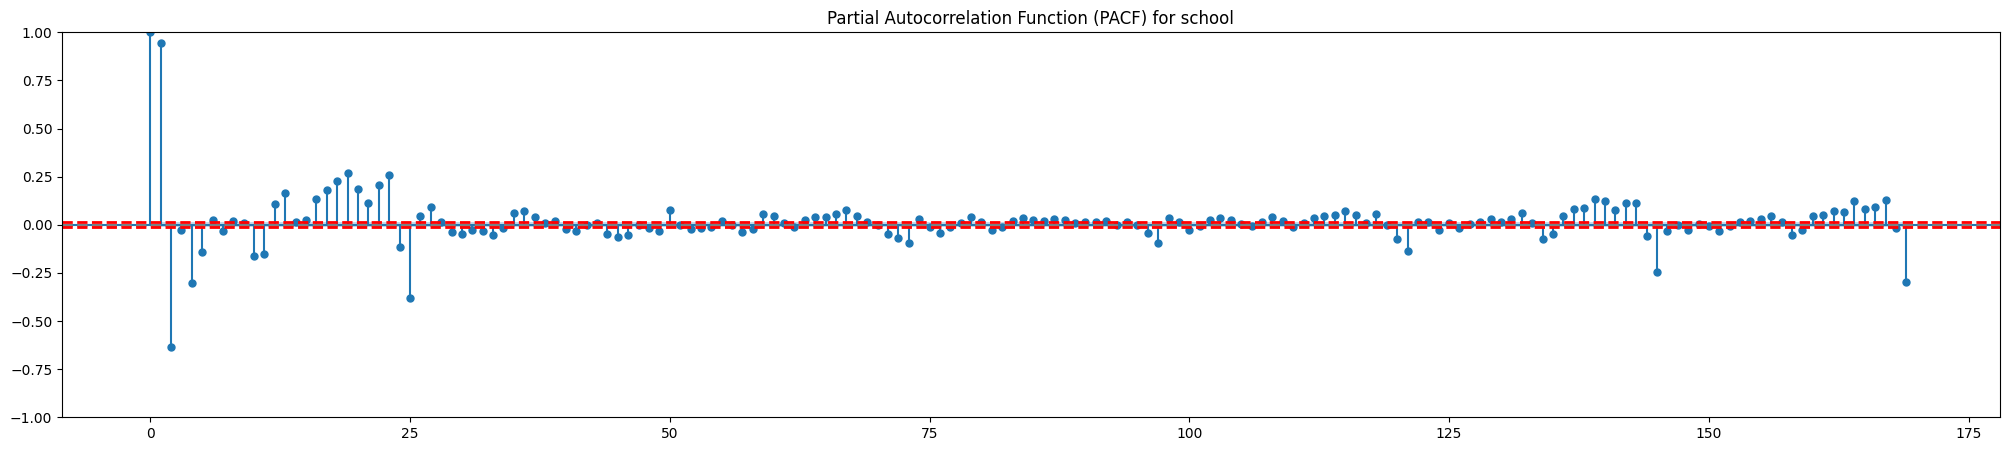

Significant Lags for school: [1, 25, 169, 4, 19, 145, 22]


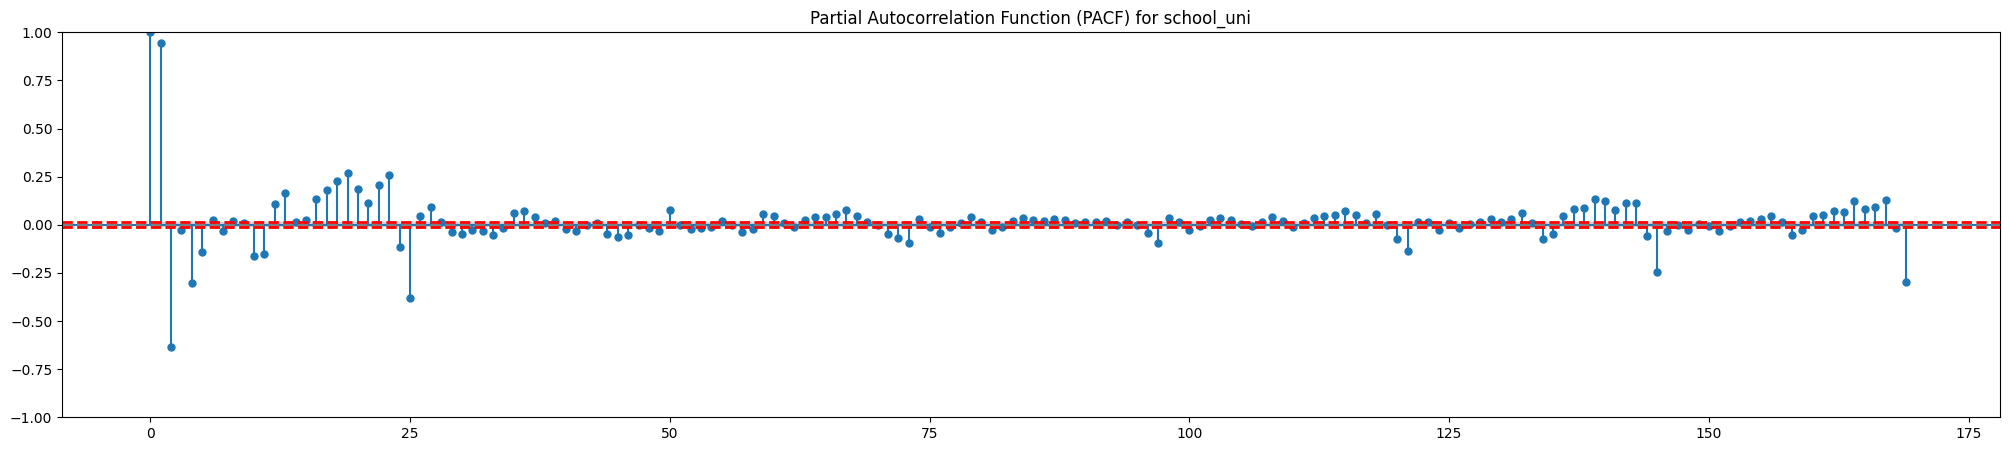

Significant Lags for school_uni: [1, 25, 169, 4, 19, 145, 22]


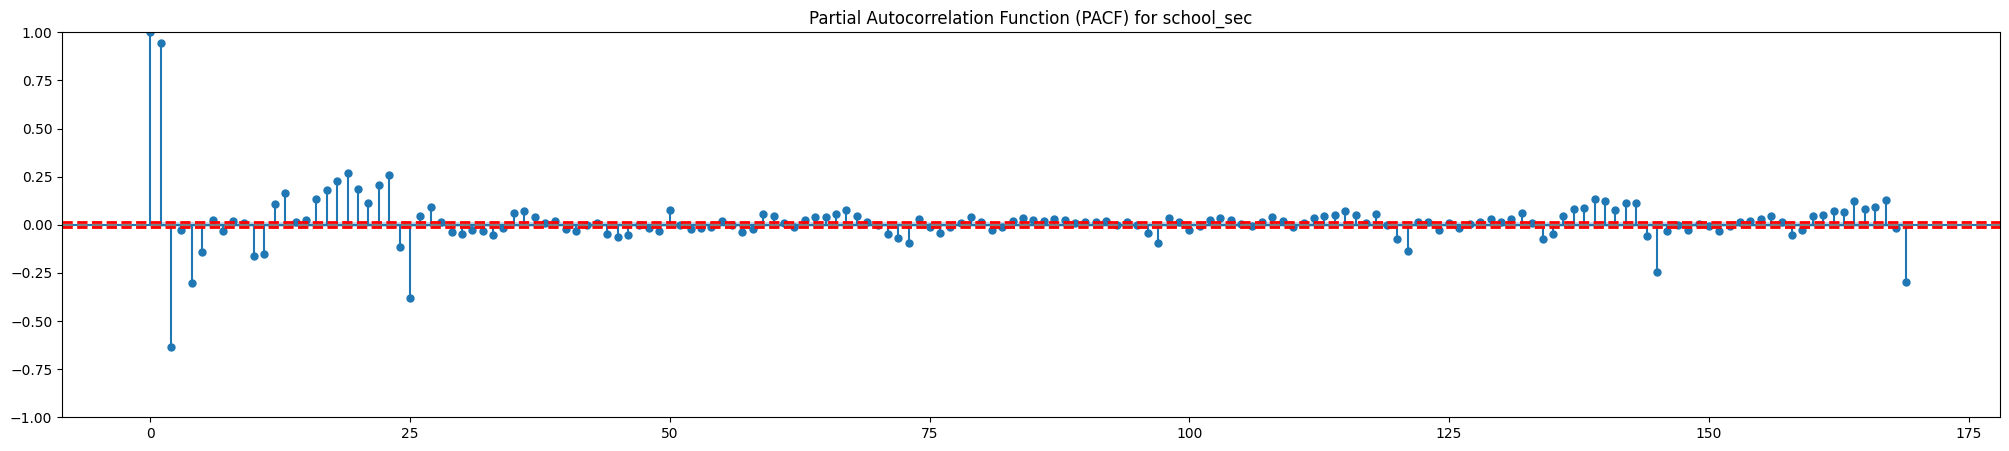

Significant Lags for school_sec: [1, 25, 169, 4, 19, 145, 22]


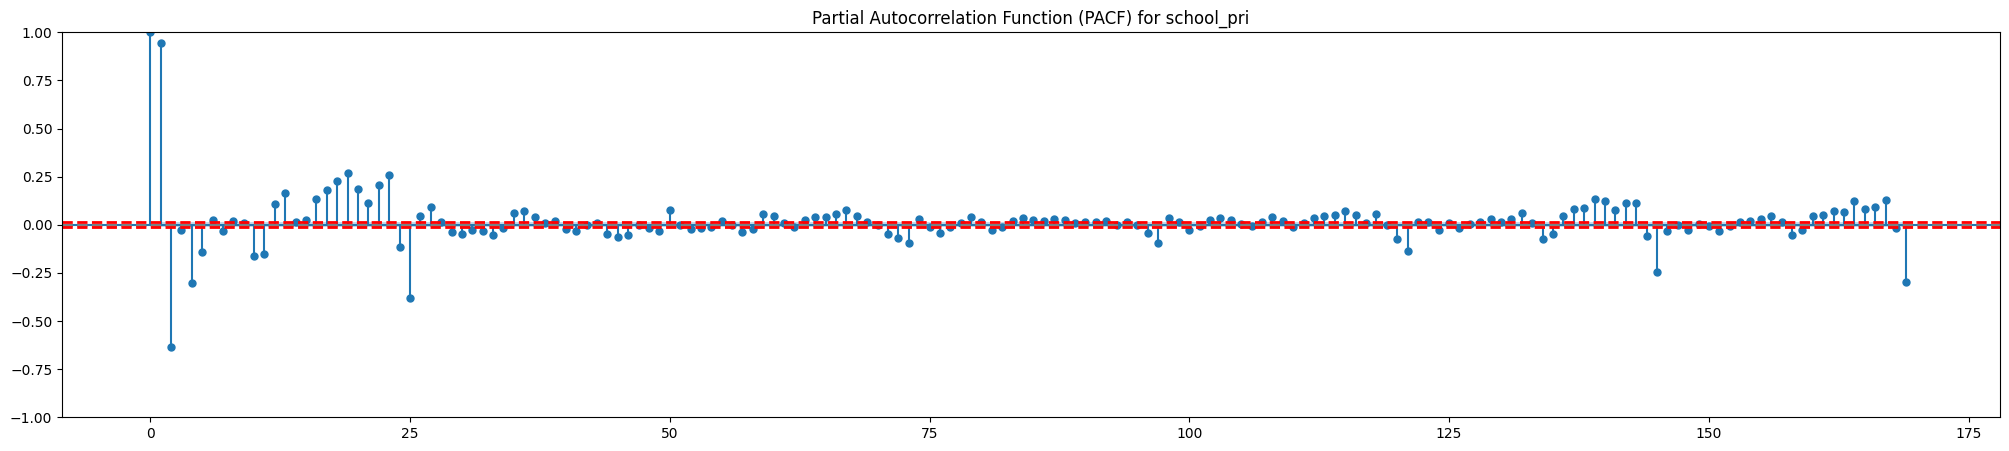

Significant Lags for school_pri: [1, 25, 169, 4, 19, 145, 22]


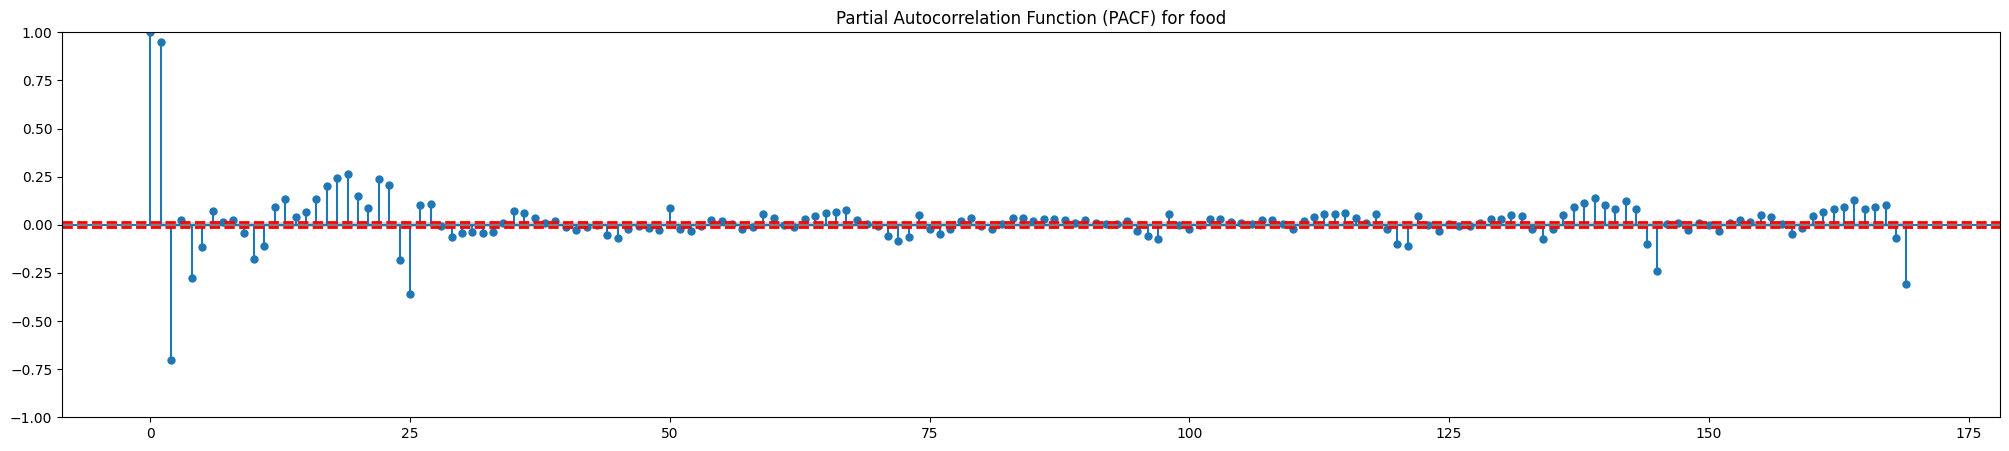

Significant Lags for food: [1, 25, 169, 4, 19, 145, 22]


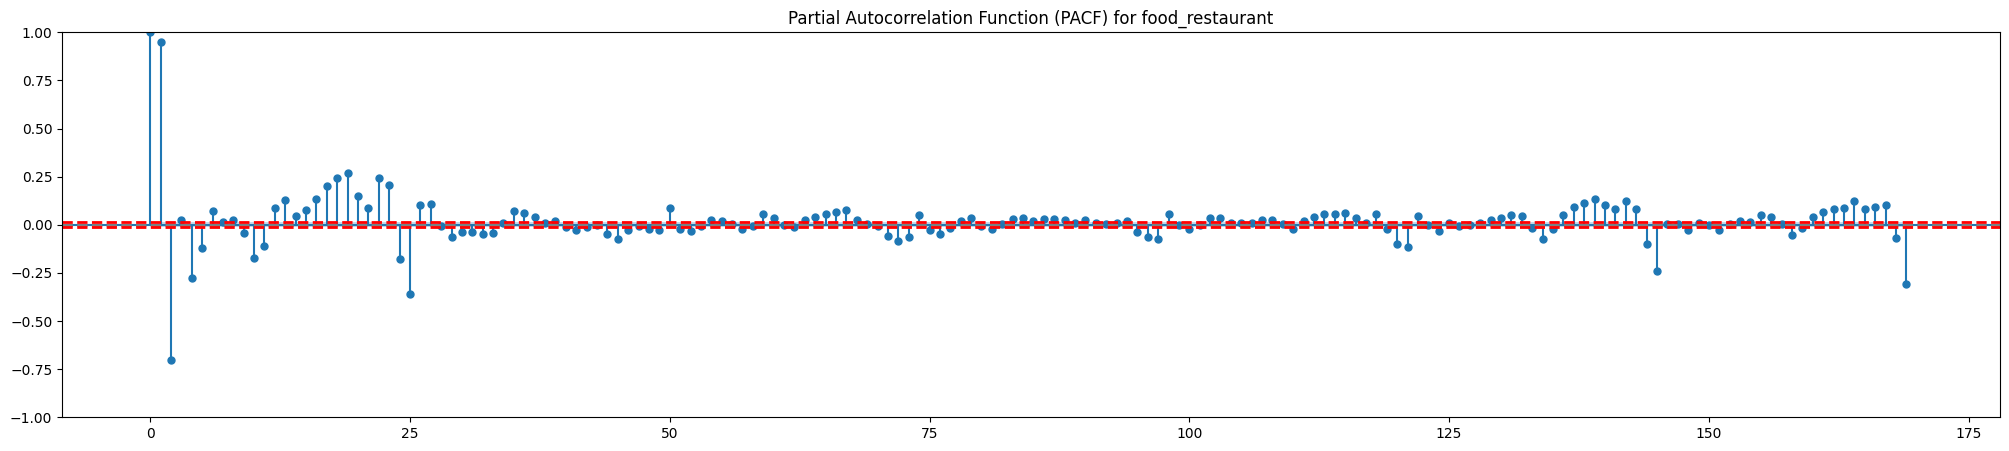

Significant Lags for food_restaurant: [1, 25, 169, 4, 19, 145, 22]


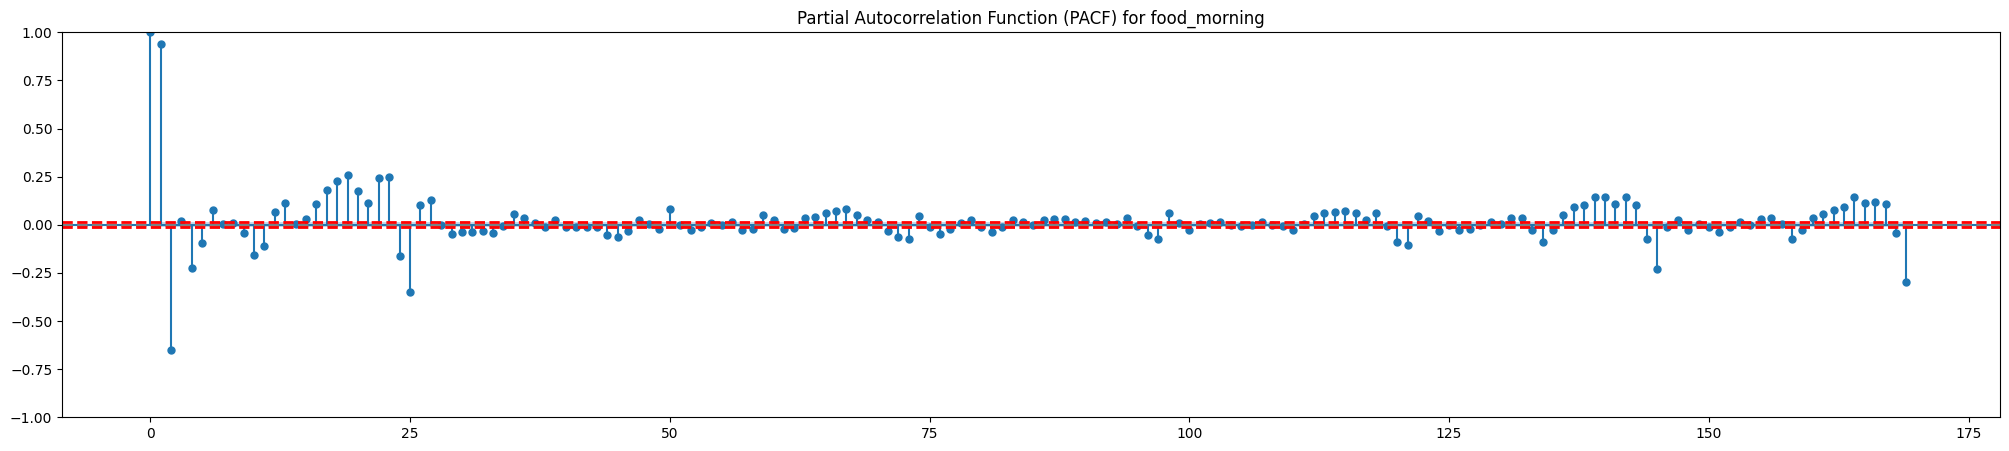

Significant Lags for food_morning: [1, 25, 169, 19, 22, 145, 4]


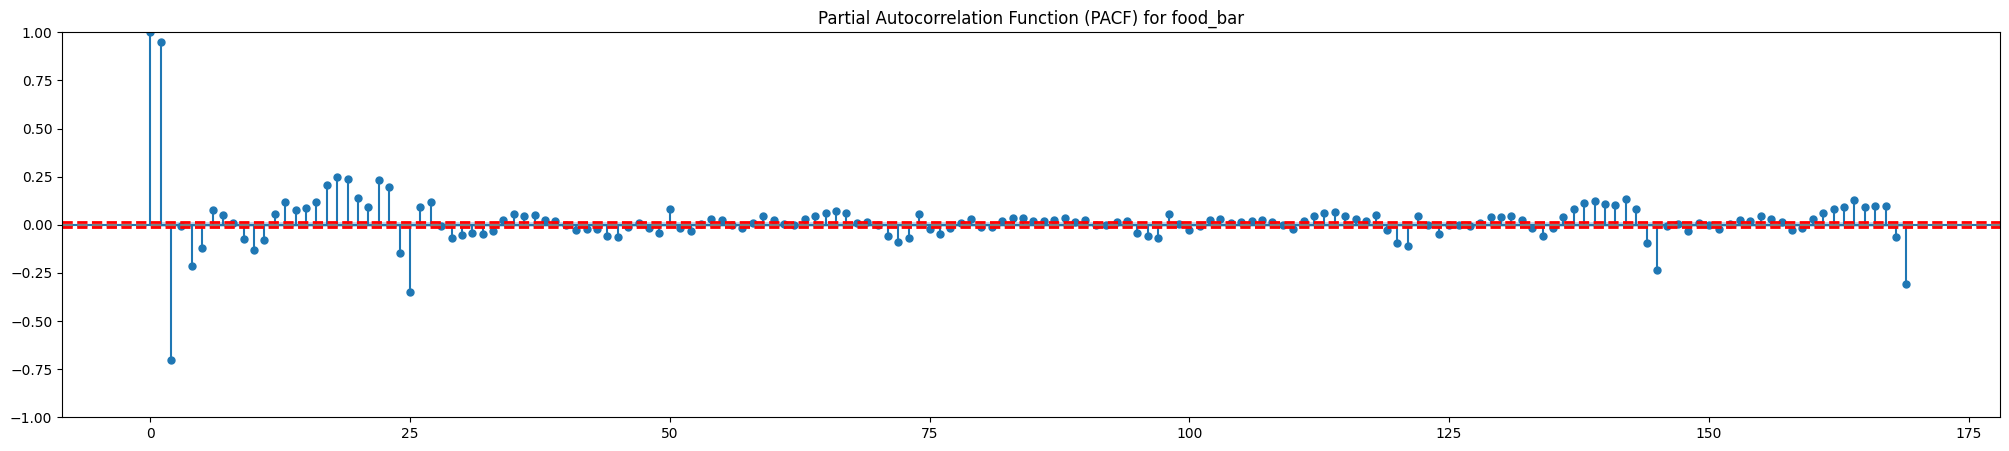

Significant Lags for food_bar: [1, 25, 169, 18, 145, 22, 4]


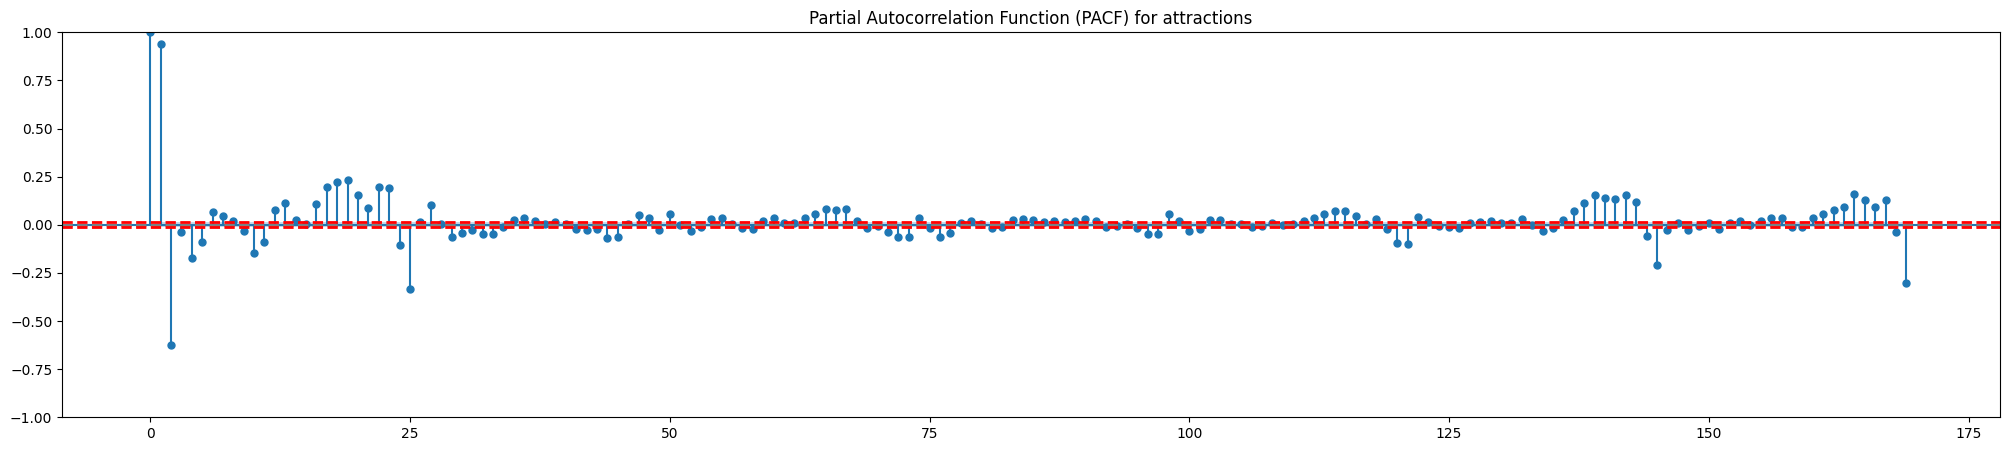

Significant Lags for attractions: [1, 25, 169, 19, 145, 22]


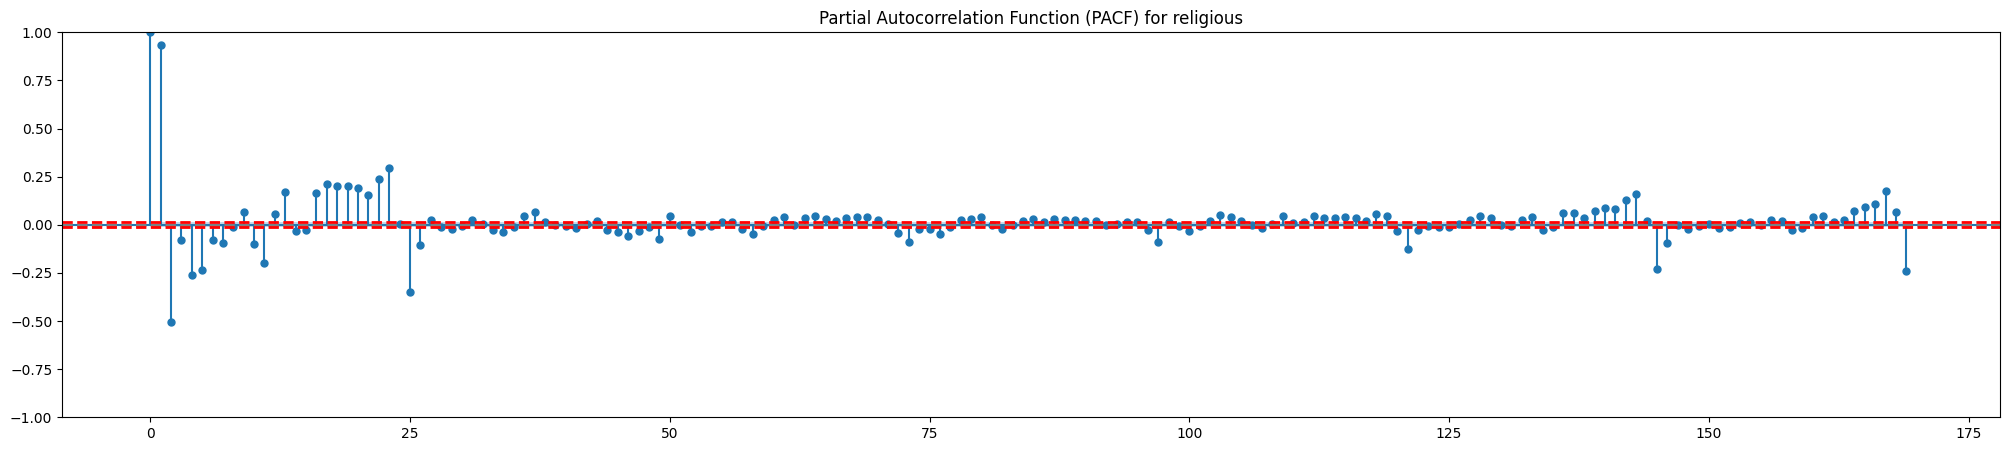

Significant Lags for religious: [1, 25, 4, 169, 22, 145, 17]


In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
import numpy as np

poi_significant_lags = {}

# Assuming zone_demand and chosen_cluster_centers are defined
for c in poi_demand.columns:
    fig, ax = plt.subplots(figsize=(25, 5))

    # Plot the PACF
    plot_pacf(poi_demand[c], lags=169, ax=ax)

    # Highlight significant lags
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=2)
    ax.axhline(y=-1.96/np.sqrt(len(poi_demand[c])), color='red', linestyle='--', linewidth=2)
    ax.axhline(y=1.96/np.sqrt(len(poi_demand[c])), color='red', linestyle='--', linewidth=2)

    plt.title(f'Partial Autocorrelation Function (PACF) for {c}')
    plt.show()

    # Compute PACF values
    pacf_values = pacf(poi_demand[c], nlags=169)

    # Extract significant lags
    top_n_lags = 11  # Adjust the number as needed
    sorted_lags = np.argsort(-np.abs(pacf_values))
    # exclude 0 (itself)
    significant_lags = sorted_lags[1:top_n_lags]

    significant_lags = significant_lags.tolist()

    # Create a copy of the list before passing it to the function
    result = remove_similar_elements(significant_lags, threshold=2, index=0)

    poi_significant_lags[c] = result

    # Print significant lags
    print(f'Significant Lags for {c}: {significant_lags}')

In [18]:
shortest_length = 100
for v in poi_significant_lags.values():
  if len(v) < shortest_length:
    shortest_length = len(v)

print("shortest length", shortest_length, "\n")

new_poi_significant_lags = {}
for k, v in poi_significant_lags.items():
  new_poi_significant_lags[k] = v[:shortest_length]

print(new_poi_significant_lags)

shortest length 6 

{'school': [1, 25, 169, 4, 19, 145], 'school_uni': [1, 25, 169, 4, 19, 145], 'school_sec': [1, 25, 169, 4, 19, 145], 'school_pri': [1, 25, 169, 4, 19, 145], 'food': [1, 25, 169, 4, 19, 145], 'food_restaurant': [1, 25, 169, 4, 19, 145], 'food_morning': [1, 25, 169, 19, 22, 145], 'food_bar': [1, 25, 169, 18, 145, 22], 'attractions': [1, 25, 169, 19, 145, 22], 'religious': [1, 25, 4, 169, 22, 145]}


In [19]:
class create_raw_features(object):
    #def __init__(self,):

    def create_lag_features(ts,lags_list):
        lag_ts0 = ts.shift(periods = lags_list[0])
        lag_ts1 = ts.shift(periods = lags_list[1])
        lag_ts2 = ts.shift(periods = lags_list[2])
        lag_ts3 = ts.shift(periods = lags_list[3])
        lag_ts4 = ts.shift(periods = lags_list[4])
        lag_ts5 = ts.shift(periods = lags_list[5])
        return lag_ts0,lag_ts1,lag_ts2,lag_ts3, lag_ts4,lag_ts5

    def create_diff_ts_features(ts,diff_list):
        diff1_p1 = ts.diff(periods=diff_list[0])
        diff1_p2 = ts.diff(periods=diff_list[1])

        diff2_p1 = ts.diff(periods=diff_list[0]).diff()
        return diff1_p1,diff1_p2,diff2_p1

In [20]:
dt = pd.Timestamp("2021-01-01") + pd.to_timedelta(range(poi_supply.shape[0]), "H")
raw_feat_df = pd.DataFrame(columns=['time_idx','datetime','group','target','inflow_lag_0','inflow_lag_1','inflow_lag_2','inflow_lag_3','inflow_lag_4','inflow_lag_5','outflow_lag_0','outflow_lag_1','outflow_lag_2','outflow_lag_3','outflow_lag_4','outflow_lag_5'])

diff_list = [1,2]

In [21]:
"""
stack all the raw feature time series of clusters vertically

tsfresh features are then added to these raw features to enlarge the feature set
"""

# inflow means supply, outflow means demand

for c in poi_supply.columns:
    lags_list = new_poi_significant_lags[c]
    temp_df = pd.DataFrame(columns=['time_idx','datetime','group','target','inflow_lag_0','inflow_lag_1','inflow_lag_2','inflow_lag_3','inflow_lag_4','inflow_lag_5','outflow_lag_0','outflow_lag_1','outflow_lag_2','outflow_lag_3', 'outflow_lag_4','outflow_lag_5','inflow', "inflow_diff1_per1", 'inflow_diff1_per2', 'inflow_diff2_per1'])
    temp_df['time_idx'] = range(poi_supply.shape[0])
    temp_df['datetime'] = dt
    temp_df['target'] = poi_demand[c]
    temp_df['group'] = np.repeat(c,poi_supply.shape[0])
    temp_df['inflow_lag_0'],temp_df['inflow_lag_1'],temp_df['inflow_lag_2'],temp_df['inflow_lag_3'], temp_df['inflow_lag_4'],temp_df['inflow_lag_5'] = create_raw_features.create_lag_features(poi_supply[c],lags_list) # <-- do u need to change lags_list to supply ones -> no dont need
    temp_df['outflow_lag_0'],temp_df['outflow_lag_1'],temp_df['outflow_lag_2'],temp_df['outflow_lag_3'], temp_df['outflow_lag_4'],temp_df['outflow_lag_5'] = create_raw_features.create_lag_features(poi_demand[c],lags_list)

    temp_df['inflow'] = poi_supply[c]
    temp_df['inflow_diff1_per1'],temp_df['inflow_diff1_per2'], temp_df['inflow_diff2_per1'] = create_raw_features.create_diff_ts_features(poi_supply[c],diff_list)

    raw_feat_df = pd.concat([raw_feat_df, temp_df],axis=0)

raw_feat_df = raw_feat_df.dropna().reset_index(drop=True)
raw_feat_df

,time_idx,datetime,group,target,inflow_lag_0,inflow_lag_1,inflow_lag_2,inflow_lag_3,inflow_lag_4,inflow_lag_5,outflow_lag_0,outflow_lag_1,outflow_lag_2,outflow_lag_3,outflow_lag_4,outflow_lag_5,inflow,inflow_diff1_per1,inflow_diff1_per2,inflow_diff2_per1
0,169,2021-01-08 01:00:00,school,66.0,101.0,87.0,422.0,448.0,305.0,90.0,118.0,104.0,449.0,399.0,337.0,82.0,50.0,-51.0,-127.0,25.0
1,170,2021-01-08 02:00:00,school,32.0,50.0,53.0,410.0,327.0,652.0,37.0,66.0,53.0,493.0,302.0,706.0,53.0,30.0,-20.0,-71.0,31.0
2,171,2021-01-08 03:00:00,school,19.0,30.0,33.0,285.0,177.0,1094.0,24.0,32.0,30.0,330.0,181.0,1139.0,23.0,19.0,-11.0,-31.0,9.0
3,172,2021-01-08 04:00:00,school,25.0,19.0,25.0,143.0,101.0,1120.0,20.0,19.0,27.0,158.0,118.0,1098.0,21.0,30.0,11.0,0.0,22.0
4,173,2021-01-08 05:00:00,school,105.0,30.0,32.0,69.0,50.0,1135.0,18.0,25.0,26.0,87.0,66.0,1201.0,18.0,85.0,55.0,66.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246435,24808,2023-10-31 16:00:00,religious,732.0,998.0,848.0,906.0,1070.0,678.0,1169.0,757.0,755.0,790.0,840.0,505.0,875.0,840.0,-158.0,-111.0,-205.0
246436,24809,2023-10-31 17:00:00,religious,637.0,840.0,798.0,910.0,882.0,476.0,942.0,732.0,660.0,792.0,699.0,329.0,764.0,697.0,-143.0,-301.0,15.0
246437,24810,2023-10-31 18:00:00,religious,602.0,697.0,737.0,951.0,879.0,297.0,895.0,637.0,501.0,735.0,711.0,171.0,641.0,665.0,-32.0,-175.0,111.0
246438,24811,2023-10-31 19:00:00,religious,452.0,665.0,678.0,998.0,942.0,124.0,933.0,602.0,505.0,757.0,697.0,78.0,876.0,582.0,-83.0,-115.0,-51.0


In [22]:
"""
Create TSFRESH Time series features

"""

win_lengths = [24] # hyperparameter

# drop all categorical columns

col_list = raw_feat_df.columns

feature_settings = {'fft_coefficient': [{'coeff': 0, 'attr': 'real'}, {'coeff': 1, 'attr': 'real'}],
                    #'mean': None,
                    #'standard_deviation': None,
                    'skewness': None,
                    'kurtosis': None,
                    #'minimum': None,
                    #'maximum': None,
                    #'sum_values': None,
                    #'variance': None,
                    #'absolute_sum_of_changes': None,
                    'count_above_mean': None,
                    'count_below_mean': None,
                    #'longest_strike_above_mean': None,
                    #'longest_strike_below_mean': None,
                    #'number_crossing_m': [{'m': 0}],
                    'autocorrelation': [{'lag': 1}, {'lag': 2}, {'lag': 3}],
                    'partial_autocorrelation': [{'lag': 1}, {'lag': 2}, {'lag': 3}]}


for c in col_list[4:]: # select 1 numeric column at a time, leave out target and long lags
    print('time series name: ',c)
    for win in win_lengths:
        num_df = raw_feat_df.loc[:,['datetime','group',c]]
        print('num_df.shape', num_df.shape)
        df_rolled = tsf.utilities.dataframe_functions.roll_time_series(num_df,column_id='group',column_sort='datetime',max_timeshift=win)
        df_rolled.drop(columns=['group'], inplace=True)
        df_features = tsf.extract_features(df_rolled, column_id='id', column_sort='datetime',
                                            default_fc_parameters=feature_settings)
        del df_rolled # free-up the RAM

        # Remove any missing values
        imputed_features = impute(df_features)
        del df_features # free-up the RAM

        # Select a subset of relevant features using tsfresh's built-in feature selection function
        raw_feat_df.index= range(raw_feat_df.shape[0])
        imputed_features.index = range(raw_feat_df.shape[0])
        selected_features = tsf.select_features(imputed_features, raw_feat_df['target'])
        del imputed_features # free-up the RAM

        # Print the names of the selected features
        print('selected_features.columns',selected_features.columns)

        print('selected_features.columns: ',selected_features.columns)
        print('selected_features.shape: ',selected_features.shape)

        print('all_stns_df.columns: ',raw_feat_df.columns)
        print('all_stns_df.shape: ',raw_feat_df.shape)

        raw_feat_df = pd.concat([raw_feat_df,selected_features],axis=1)

        del num_df # free-up the RAM
        del selected_features # free-up the RAM

raw_feat_df.shape

time series name:  inflow_lag_0
num_df.shape (246440, 3)


Feature Extraction: 100%|██████████| 20/20 [02:00<00:00,  6.02s/it]


selected_features.columns Index(['inflow_lag_0__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_0__skewness', 'inflow_lag_0__kurtosis',
       'inflow_lag_0__count_above_mean', 'inflow_lag_0__count_below_mean',
       'inflow_lag_0__autocorrelation__lag_1',
       'inflow_lag_0__autocorrelation__lag_2',
       'inflow_lag_0__autocorrelation__lag_3',
       'inflow_lag_0__partial_autocorrelation__lag_1',
       'inflow_lag_0__partial_autocorrelation__lag_2',
       'inflow_lag_0__partial_autocorrelation__lag_3',
       'inflow_lag_0__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag_0__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_0__skewness', 'inflow_lag_0__kurtosis',
       'inflow_lag_0__count_above_mean', 'inflow_lag_0__count_below_mean',
       'inflow_lag_0__autocorrelation__lag_1',
       'inflow_lag_0__autocorrelation__lag_2',
       'inflow_lag_0__autocorrelation__lag_3',
       'inflow_lag_0__

Feature Extraction: 100%|██████████| 20/20 [02:04<00:00,  6.23s/it]


selected_features.columns Index(['inflow_lag_1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_1__skewness', 'inflow_lag_1__kurtosis',
       'inflow_lag_1__count_above_mean', 'inflow_lag_1__count_below_mean',
       'inflow_lag_1__autocorrelation__lag_1',
       'inflow_lag_1__autocorrelation__lag_2',
       'inflow_lag_1__autocorrelation__lag_3',
       'inflow_lag_1__partial_autocorrelation__lag_1',
       'inflow_lag_1__partial_autocorrelation__lag_2',
       'inflow_lag_1__partial_autocorrelation__lag_3',
       'inflow_lag_1__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag_1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_1__skewness', 'inflow_lag_1__kurtosis',
       'inflow_lag_1__count_above_mean', 'inflow_lag_1__count_below_mean',
       'inflow_lag_1__autocorrelation__lag_1',
       'inflow_lag_1__autocorrelation__lag_2',
       'inflow_lag_1__autocorrelation__lag_3',
       'inflow_lag_1__

Feature Extraction: 100%|██████████| 20/20 [02:05<00:00,  6.28s/it]


selected_features.columns Index(['inflow_lag_2__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_2__skewness', 'inflow_lag_2__kurtosis',
       'inflow_lag_2__count_above_mean', 'inflow_lag_2__count_below_mean',
       'inflow_lag_2__autocorrelation__lag_1',
       'inflow_lag_2__autocorrelation__lag_2',
       'inflow_lag_2__autocorrelation__lag_3',
       'inflow_lag_2__partial_autocorrelation__lag_1',
       'inflow_lag_2__partial_autocorrelation__lag_2',
       'inflow_lag_2__partial_autocorrelation__lag_3',
       'inflow_lag_2__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag_2__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_2__skewness', 'inflow_lag_2__kurtosis',
       'inflow_lag_2__count_above_mean', 'inflow_lag_2__count_below_mean',
       'inflow_lag_2__autocorrelation__lag_1',
       'inflow_lag_2__autocorrelation__lag_2',
       'inflow_lag_2__autocorrelation__lag_3',
       'inflow_lag_2__

Feature Extraction: 100%|██████████| 20/20 [02:05<00:00,  6.28s/it]


selected_features.columns Index(['inflow_lag_3__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_3__skewness', 'inflow_lag_3__kurtosis',
       'inflow_lag_3__count_above_mean', 'inflow_lag_3__count_below_mean',
       'inflow_lag_3__autocorrelation__lag_3',
       'inflow_lag_3__autocorrelation__lag_2',
       'inflow_lag_3__partial_autocorrelation__lag_1',
       'inflow_lag_3__autocorrelation__lag_1',
       'inflow_lag_3__partial_autocorrelation__lag_3',
       'inflow_lag_3__partial_autocorrelation__lag_2',
       'inflow_lag_3__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag_3__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_3__skewness', 'inflow_lag_3__kurtosis',
       'inflow_lag_3__count_above_mean', 'inflow_lag_3__count_below_mean',
       'inflow_lag_3__autocorrelation__lag_3',
       'inflow_lag_3__autocorrelation__lag_2',
       'inflow_lag_3__partial_autocorrelation__lag_1',
       'inflow

Feature Extraction: 100%|██████████| 20/20 [02:05<00:00,  6.26s/it]


selected_features.columns Index(['inflow_lag_4__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_4__skewness', 'inflow_lag_4__kurtosis',
       'inflow_lag_4__count_above_mean', 'inflow_lag_4__count_below_mean',
       'inflow_lag_4__autocorrelation__lag_3',
       'inflow_lag_4__autocorrelation__lag_2',
       'inflow_lag_4__partial_autocorrelation__lag_1',
       'inflow_lag_4__autocorrelation__lag_1',
       'inflow_lag_4__partial_autocorrelation__lag_2',
       'inflow_lag_4__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag_4__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_4__skewness', 'inflow_lag_4__kurtosis',
       'inflow_lag_4__count_above_mean', 'inflow_lag_4__count_below_mean',
       'inflow_lag_4__autocorrelation__lag_3',
       'inflow_lag_4__autocorrelation__lag_2',
       'inflow_lag_4__partial_autocorrelation__lag_1',
       'inflow_lag_4__autocorrelation__lag_1',
       'inflow_lag_4__

Feature Extraction: 100%|██████████| 20/20 [02:09<00:00,  6.46s/it]


selected_features.columns Index(['inflow_lag_5__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_5__skewness', 'inflow_lag_5__kurtosis',
       'inflow_lag_5__count_above_mean', 'inflow_lag_5__count_below_mean',
       'inflow_lag_5__autocorrelation__lag_1',
       'inflow_lag_5__autocorrelation__lag_2',
       'inflow_lag_5__autocorrelation__lag_3',
       'inflow_lag_5__partial_autocorrelation__lag_1',
       'inflow_lag_5__partial_autocorrelation__lag_2',
       'inflow_lag_5__partial_autocorrelation__lag_3',
       'inflow_lag_5__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag_5__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag_5__skewness', 'inflow_lag_5__kurtosis',
       'inflow_lag_5__count_above_mean', 'inflow_lag_5__count_below_mean',
       'inflow_lag_5__autocorrelation__lag_1',
       'inflow_lag_5__autocorrelation__lag_2',
       'inflow_lag_5__autocorrelation__lag_3',
       'inflow_lag_5__

Feature Extraction: 100%|██████████| 20/20 [02:07<00:00,  6.37s/it]


selected_features.columns Index(['outflow_lag_0__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_0__skewness', 'outflow_lag_0__kurtosis',
       'outflow_lag_0__count_above_mean', 'outflow_lag_0__count_below_mean',
       'outflow_lag_0__autocorrelation__lag_1',
       'outflow_lag_0__autocorrelation__lag_2',
       'outflow_lag_0__autocorrelation__lag_3',
       'outflow_lag_0__partial_autocorrelation__lag_1',
       'outflow_lag_0__partial_autocorrelation__lag_2',
       'outflow_lag_0__partial_autocorrelation__lag_3',
       'outflow_lag_0__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag_0__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_0__skewness', 'outflow_lag_0__kurtosis',
       'outflow_lag_0__count_above_mean', 'outflow_lag_0__count_below_mean',
       'outflow_lag_0__autocorrelation__lag_1',
       'outflow_lag_0__autocorrelation__lag_2',
       'outflow_lag_0__autocorrelation__lag_3',
  

Feature Extraction: 100%|██████████| 20/20 [02:09<00:00,  6.48s/it]


selected_features.columns Index(['outflow_lag_1__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_1__skewness', 'outflow_lag_1__kurtosis',
       'outflow_lag_1__count_above_mean', 'outflow_lag_1__count_below_mean',
       'outflow_lag_1__autocorrelation__lag_1',
       'outflow_lag_1__autocorrelation__lag_2',
       'outflow_lag_1__autocorrelation__lag_3',
       'outflow_lag_1__partial_autocorrelation__lag_1',
       'outflow_lag_1__partial_autocorrelation__lag_2',
       'outflow_lag_1__partial_autocorrelation__lag_3',
       'outflow_lag_1__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag_1__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_1__skewness', 'outflow_lag_1__kurtosis',
       'outflow_lag_1__count_above_mean', 'outflow_lag_1__count_below_mean',
       'outflow_lag_1__autocorrelation__lag_1',
       'outflow_lag_1__autocorrelation__lag_2',
       'outflow_lag_1__autocorrelation__lag_3',
  

Feature Extraction: 100%|██████████| 20/20 [02:08<00:00,  6.43s/it]


selected_features.columns Index(['outflow_lag_2__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_2__skewness', 'outflow_lag_2__kurtosis',
       'outflow_lag_2__count_above_mean', 'outflow_lag_2__count_below_mean',
       'outflow_lag_2__autocorrelation__lag_1',
       'outflow_lag_2__autocorrelation__lag_2',
       'outflow_lag_2__autocorrelation__lag_3',
       'outflow_lag_2__partial_autocorrelation__lag_1',
       'outflow_lag_2__partial_autocorrelation__lag_2',
       'outflow_lag_2__partial_autocorrelation__lag_3',
       'outflow_lag_2__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag_2__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_2__skewness', 'outflow_lag_2__kurtosis',
       'outflow_lag_2__count_above_mean', 'outflow_lag_2__count_below_mean',
       'outflow_lag_2__autocorrelation__lag_1',
       'outflow_lag_2__autocorrelation__lag_2',
       'outflow_lag_2__autocorrelation__lag_3',
  

Feature Extraction: 100%|██████████| 20/20 [02:07<00:00,  6.40s/it]


selected_features.columns Index(['outflow_lag_3__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_3__skewness', 'outflow_lag_3__kurtosis',
       'outflow_lag_3__count_above_mean', 'outflow_lag_3__count_below_mean',
       'outflow_lag_3__autocorrelation__lag_3',
       'outflow_lag_3__autocorrelation__lag_2',
       'outflow_lag_3__fft_coefficient__attr_"real"__coeff_0',
       'outflow_lag_3__partial_autocorrelation__lag_1',
       'outflow_lag_3__autocorrelation__lag_1',
       'outflow_lag_3__partial_autocorrelation__lag_2'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag_3__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_3__skewness', 'outflow_lag_3__kurtosis',
       'outflow_lag_3__count_above_mean', 'outflow_lag_3__count_below_mean',
       'outflow_lag_3__autocorrelation__lag_3',
       'outflow_lag_3__autocorrelation__lag_2',
       'outflow_lag_3__fft_coefficient__attr_"real"__coeff_0',
       'outflow_lag_3__partial_autocorrelat

Feature Extraction: 100%|██████████| 20/20 [02:08<00:00,  6.41s/it]


selected_features.columns Index(['outflow_lag_4__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_4__skewness', 'outflow_lag_4__kurtosis',
       'outflow_lag_4__count_above_mean', 'outflow_lag_4__count_below_mean',
       'outflow_lag_4__autocorrelation__lag_2',
       'outflow_lag_4__autocorrelation__lag_3',
       'outflow_lag_4__partial_autocorrelation__lag_1',
       'outflow_lag_4__autocorrelation__lag_1',
       'outflow_lag_4__partial_autocorrelation__lag_2',
       'outflow_lag_4__fft_coefficient__attr_"real"__coeff_0',
       'outflow_lag_4__partial_autocorrelation__lag_3'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag_4__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_4__skewness', 'outflow_lag_4__kurtosis',
       'outflow_lag_4__count_above_mean', 'outflow_lag_4__count_below_mean',
       'outflow_lag_4__autocorrelation__lag_2',
       'outflow_lag_4__autocorrelation__lag_3',
       'outflow_lag_4__partial_autocorrelation__la

Feature Extraction: 100%|██████████| 20/20 [02:04<00:00,  6.22s/it]


selected_features.columns Index(['outflow_lag_5__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_5__skewness', 'outflow_lag_5__kurtosis',
       'outflow_lag_5__count_above_mean', 'outflow_lag_5__count_below_mean',
       'outflow_lag_5__autocorrelation__lag_1',
       'outflow_lag_5__autocorrelation__lag_2',
       'outflow_lag_5__autocorrelation__lag_3',
       'outflow_lag_5__partial_autocorrelation__lag_1',
       'outflow_lag_5__partial_autocorrelation__lag_2',
       'outflow_lag_5__partial_autocorrelation__lag_3',
       'outflow_lag_5__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag_5__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag_5__skewness', 'outflow_lag_5__kurtosis',
       'outflow_lag_5__count_above_mean', 'outflow_lag_5__count_below_mean',
       'outflow_lag_5__autocorrelation__lag_1',
       'outflow_lag_5__autocorrelation__lag_2',
       'outflow_lag_5__autocorrelation__lag_3',
  

Feature Extraction: 100%|██████████| 20/20 [02:05<00:00,  6.29s/it]


selected_features.columns Index(['inflow__fft_coefficient__attr_"real"__coeff_1', 'inflow__skewness',
       'inflow__kurtosis', 'inflow__count_above_mean',
       'inflow__count_below_mean', 'inflow__autocorrelation__lag_1',
       'inflow__autocorrelation__lag_2', 'inflow__autocorrelation__lag_3',
       'inflow__partial_autocorrelation__lag_1',
       'inflow__partial_autocorrelation__lag_2',
       'inflow__partial_autocorrelation__lag_3',
       'inflow__fft_coefficient__attr_"real"__coeff_0'],
      dtype='object')
selected_features.columns:  Index(['inflow__fft_coefficient__attr_"real"__coeff_1', 'inflow__skewness',
       'inflow__kurtosis', 'inflow__count_above_mean',
       'inflow__count_below_mean', 'inflow__autocorrelation__lag_1',
       'inflow__autocorrelation__lag_2', 'inflow__autocorrelation__lag_3',
       'inflow__partial_autocorrelation__lag_1',
       'inflow__partial_autocorrelation__lag_2',
       'inflow__partial_autocorrelation__lag_3',
       'inflow__fft_coe

Feature Extraction: 100%|██████████| 20/20 [02:03<00:00,  6.20s/it]


selected_features.columns Index(['inflow_diff1_per1__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per1__autocorrelation__lag_3',
       'inflow_diff1_per1__partial_autocorrelation__lag_2',
       'inflow_diff1_per1__count_above_mean',
       'inflow_diff1_per1__count_below_mean', 'inflow_diff1_per1__skewness',
       'inflow_diff1_per1__autocorrelation__lag_2',
       'inflow_diff1_per1__autocorrelation__lag_1',
       'inflow_diff1_per1__partial_autocorrelation__lag_1',
       'inflow_diff1_per1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff1_per1__kurtosis',
       'inflow_diff1_per1__partial_autocorrelation__lag_3'],
      dtype='object')
selected_features.columns:  Index(['inflow_diff1_per1__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per1__autocorrelation__lag_3',
       'inflow_diff1_per1__partial_autocorrelation__lag_2',
       'inflow_diff1_per1__count_above_mean',
       'inflow_diff1_per1__count_below_mean', 'inflow_diff1_per1__s

Feature Extraction: 100%|██████████| 20/20 [02:08<00:00,  6.40s/it]


selected_features.columns Index(['inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff1_per2__count_above_mean',
       'inflow_diff1_per2__count_below_mean',
       'inflow_diff1_per2__autocorrelation__lag_3',
       'inflow_diff1_per2__skewness',
       'inflow_diff1_per2__partial_autocorrelation__lag_2',
       'inflow_diff1_per2__autocorrelation__lag_2',
       'inflow_diff1_per2__kurtosis',
       'inflow_diff1_per2__partial_autocorrelation__lag_1',
       'inflow_diff1_per2__autocorrelation__lag_1'],
      dtype='object')
selected_features.columns:  Index(['inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff1_per2__count_above_mean',
       'inflow_diff1_per2__count_below_mean',
       'inflow_diff1_per2__autocorrelation__lag_3',
       'inflow_diff1_per2__skewness',
       'inflow_diff1_per2__pa

Feature Extraction: 100%|██████████| 20/20 [02:07<00:00,  6.35s/it]


selected_features.columns Index(['inflow_diff2_per1__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff2_per1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff2_per1__count_above_mean',
       'inflow_diff2_per1__count_below_mean',
       'inflow_diff2_per1__autocorrelation__lag_1',
       'inflow_diff2_per1__autocorrelation__lag_3',
       'inflow_diff2_per1__partial_autocorrelation__lag_1',
       'inflow_diff2_per1__skewness',
       'inflow_diff2_per1__autocorrelation__lag_2',
       'inflow_diff2_per1__kurtosis',
       'inflow_diff2_per1__partial_autocorrelation__lag_2'],
      dtype='object')
selected_features.columns:  Index(['inflow_diff2_per1__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff2_per1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff2_per1__count_above_mean',
       'inflow_diff2_per1__count_below_mean',
       'inflow_diff2_per1__autocorrelation__lag_1',
       'inflow_diff2_per1__autocorrelation__lag_3',
       'inflow_

(246440, 208)

In [23]:
for c in raw_feat_df.columns:
    print(c)

time_idx
datetime
group
target
inflow_lag_0
inflow_lag_1
inflow_lag_2
inflow_lag_3
inflow_lag_4
inflow_lag_5
outflow_lag_0
outflow_lag_1
outflow_lag_2
outflow_lag_3
outflow_lag_4
outflow_lag_5
inflow
inflow_diff1_per1
inflow_diff1_per2
inflow_diff2_per1
inflow_lag_0__fft_coefficient__attr_"real"__coeff_1
inflow_lag_0__skewness
inflow_lag_0__kurtosis
inflow_lag_0__count_above_mean
inflow_lag_0__count_below_mean
inflow_lag_0__autocorrelation__lag_1
inflow_lag_0__autocorrelation__lag_2
inflow_lag_0__autocorrelation__lag_3
inflow_lag_0__partial_autocorrelation__lag_1
inflow_lag_0__partial_autocorrelation__lag_2
inflow_lag_0__partial_autocorrelation__lag_3
inflow_lag_0__fft_coefficient__attr_"real"__coeff_0
inflow_lag_1__fft_coefficient__attr_"real"__coeff_1
inflow_lag_1__skewness
inflow_lag_1__kurtosis
inflow_lag_1__count_above_mean
inflow_lag_1__count_below_mean
inflow_lag_1__autocorrelation__lag_1
inflow_lag_1__autocorrelation__lag_2
inflow_lag_1__autocorrelation__lag_3
inflow_lag_1__par

In [24]:
raw_feat_df

,time_idx,datetime,group,target,inflow_lag_0,inflow_lag_1,inflow_lag_2,inflow_lag_3,inflow_lag_4,inflow_lag_5,...,"inflow_diff2_per1__fft_coefficient__attr_""real""__coeff_1",inflow_diff2_per1__count_above_mean,inflow_diff2_per1__count_below_mean,inflow_diff2_per1__autocorrelation__lag_1,inflow_diff2_per1__autocorrelation__lag_3,inflow_diff2_per1__partial_autocorrelation__lag_1,inflow_diff2_per1__skewness,inflow_diff2_per1__autocorrelation__lag_2,inflow_diff2_per1__kurtosis,inflow_diff2_per1__partial_autocorrelation__lag_2
0,169,2021-01-08 01:00:00,school,66.0,101.0,87.0,422.0,448.0,305.0,90.0,...,-60.456708,0.0,0.0,-0.081640,-0.027738,-0.081622,-0.496245,-0.263488,0.490017,-0.303142
1,170,2021-01-08 02:00:00,school,32.0,50.0,53.0,410.0,327.0,652.0,37.0,...,-14.000000,1.0,1.0,-1.000000,-0.027738,-0.081622,-0.496245,-0.263488,0.490017,-0.303142
2,171,2021-01-08 03:00:00,school,19.0,30.0,33.0,285.0,177.0,1094.0,24.0,...,-2.500000,1.0,2.0,-0.849256,-0.027738,-0.081622,0.633716,0.198511,0.490017,-0.303142
3,172,2021-01-08 04:00:00,school,25.0,19.0,25.0,143.0,101.0,1120.0,20.0,...,9.000000,2.0,2.0,-0.929158,-0.711447,-0.929158,-0.071375,0.749460,-2.711060,-0.303142
4,173,2021-01-08 05:00:00,school,105.0,30.0,32.0,69.0,50.0,1135.0,18.0,...,1.225425,3.0,2.0,-0.268487,-0.207884,-0.268487,-0.544485,-0.049543,-1.927011,-0.303142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246435,24808,2023-10-31 16:00:00,religious,732.0,998.0,848.0,906.0,1070.0,678.0,1169.0,...,-2348.787241,13.0,12.0,0.160769,-0.059342,0.160769,-0.004889,-0.165414,-1.039837,-0.196335
246436,24809,2023-10-31 17:00:00,religious,637.0,840.0,798.0,910.0,882.0,476.0,942.0,...,-1053.705532,14.0,11.0,0.129439,-0.185665,0.129439,-0.071656,-0.180286,-0.891656,-0.200398
246437,24810,2023-10-31 18:00:00,religious,602.0,697.0,737.0,951.0,879.0,297.0,895.0,...,-159.359368,15.0,10.0,0.142760,-0.226929,0.142760,-0.186733,-0.239184,-0.900303,-0.264965
246438,24811,2023-10-31 19:00:00,religious,452.0,665.0,678.0,998.0,942.0,124.0,933.0,...,-141.605817,14.0,11.0,0.139179,-0.186107,0.139179,-0.059585,-0.234582,-1.027312,-0.258970


In [25]:
pip install pyarrow

In [26]:
raw_feat_df.to_parquet('[Draft_2]_combined_dd_ss_raw_feat_data_poi_aggregation.parquet')

In [29]:
df = pd.read_parquet('[Draft_2]_combined_dd_ss_raw_feat_data_poi_aggregation.parquet', engine='pyarrow')
df

,time_idx,datetime,group,target,inflow_lag_0,inflow_lag_1,inflow_lag_2,inflow_lag_3,inflow_lag_4,inflow_lag_5,...,"inflow_diff2_per1__fft_coefficient__attr_""real""__coeff_1",inflow_diff2_per1__count_above_mean,inflow_diff2_per1__count_below_mean,inflow_diff2_per1__autocorrelation__lag_1,inflow_diff2_per1__autocorrelation__lag_3,inflow_diff2_per1__partial_autocorrelation__lag_1,inflow_diff2_per1__skewness,inflow_diff2_per1__autocorrelation__lag_2,inflow_diff2_per1__kurtosis,inflow_diff2_per1__partial_autocorrelation__lag_2
0,169,2021-01-08 01:00:00,school,66.0,101.0,87.0,422.0,448.0,305.0,90.0,...,-60.456708,0.0,0.0,-0.081640,-0.027738,-0.081622,-0.496245,-0.263488,0.490017,-0.303142
1,170,2021-01-08 02:00:00,school,32.0,50.0,53.0,410.0,327.0,652.0,37.0,...,-14.000000,1.0,1.0,-1.000000,-0.027738,-0.081622,-0.496245,-0.263488,0.490017,-0.303142
2,171,2021-01-08 03:00:00,school,19.0,30.0,33.0,285.0,177.0,1094.0,24.0,...,-2.500000,1.0,2.0,-0.849256,-0.027738,-0.081622,0.633716,0.198511,0.490017,-0.303142
3,172,2021-01-08 04:00:00,school,25.0,19.0,25.0,143.0,101.0,1120.0,20.0,...,9.000000,2.0,2.0,-0.929158,-0.711447,-0.929158,-0.071375,0.749460,-2.711060,-0.303142
4,173,2021-01-08 05:00:00,school,105.0,30.0,32.0,69.0,50.0,1135.0,18.0,...,1.225425,3.0,2.0,-0.268487,-0.207884,-0.268487,-0.544485,-0.049543,-1.927011,-0.303142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246435,24808,2023-10-31 16:00:00,religious,732.0,998.0,848.0,906.0,1070.0,678.0,1169.0,...,-2348.787241,13.0,12.0,0.160769,-0.059342,0.160769,-0.004889,-0.165414,-1.039837,-0.196335
246436,24809,2023-10-31 17:00:00,religious,637.0,840.0,798.0,910.0,882.0,476.0,942.0,...,-1053.705532,14.0,11.0,0.129439,-0.185665,0.129439,-0.071656,-0.180286,-0.891656,-0.200398
246437,24810,2023-10-31 18:00:00,religious,602.0,697.0,737.0,951.0,879.0,297.0,895.0,...,-159.359368,15.0,10.0,0.142760,-0.226929,0.142760,-0.186733,-0.239184,-0.900303,-0.264965
246438,24811,2023-10-31 19:00:00,religious,452.0,665.0,678.0,998.0,942.0,124.0,933.0,...,-141.605817,14.0,11.0,0.139179,-0.186107,0.139179,-0.059585,-0.234582,-1.027312,-0.258970


In [30]:
for c in df.columns:
  print(c)

time_idx
datetime
group
target
inflow_lag_0
inflow_lag_1
inflow_lag_2
inflow_lag_3
inflow_lag_4
inflow_lag_5
outflow_lag_0
outflow_lag_1
outflow_lag_2
outflow_lag_3
outflow_lag_4
outflow_lag_5
inflow
inflow_diff1_per1
inflow_diff1_per2
inflow_diff2_per1
inflow_lag_0__fft_coefficient__attr_"real"__coeff_1
inflow_lag_0__skewness
inflow_lag_0__kurtosis
inflow_lag_0__count_above_mean
inflow_lag_0__count_below_mean
inflow_lag_0__autocorrelation__lag_1
inflow_lag_0__autocorrelation__lag_2
inflow_lag_0__autocorrelation__lag_3
inflow_lag_0__partial_autocorrelation__lag_1
inflow_lag_0__partial_autocorrelation__lag_2
inflow_lag_0__partial_autocorrelation__lag_3
inflow_lag_0__fft_coefficient__attr_"real"__coeff_0
inflow_lag_1__fft_coefficient__attr_"real"__coeff_1
inflow_lag_1__skewness
inflow_lag_1__kurtosis
inflow_lag_1__count_above_mean
inflow_lag_1__count_below_mean
inflow_lag_1__autocorrelation__lag_1
inflow_lag_1__autocorrelation__lag_2
inflow_lag_1__autocorrelation__lag_3
inflow_lag_1__par